In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
df = pd.read_csv("smartphone_cleaned_model.csv")

In [241]:
df.head()

,brand_names,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,ram_capacity,internal_memory,battery_capacity,fast_charging_available,fast_charging,screen_size,resolution,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oppo,OPPO A59 5G,14999,71.0,True,False,False,dimensity,8.0,2.2,4.0,128.0,5000.0,1.0,33.0,6.56,720 x 1612,90.0,2.0,1.0,android,13.0,8.0,1.0,1024.0
1,xiaomi,Xiaomi Redmi 13C 5G,10999,74.0,True,False,False,dimensity,8.0,2.2,4.0,128.0,5000.0,1.0,18.0,6.74,720 x 1600,90.0,2.0,1.0,android,50.0,5.0,1.0,1024.0
2,motorola,Motorola Edge 40 Neo,22999,84.0,True,True,False,dimensity,8.0,2.5,8.0,128.0,5000.0,1.0,68.0,6.55,1080 x 2400,144.0,2.0,1.0,android,50.0,32.0,0.0,1024.0
3,motorola,Motorola Moto G54 5G,13999,84.0,True,False,False,dimensity,8.0,2.2,8.0,128.0,6000.0,1.0,33.0,6.50,1080 x 2400,120.0,2.0,1.0,android,50.0,16.0,1.0,1024.0
4,oneplus,OnePlus Nord CE 3 5G,24679,84.0,True,True,True,snapdragon,8.0,2.7,8.0,128.0,5000.0,1.0,80.0,6.70,1080 x 2412,120.0,3.0,1.0,android,50.0,16.0,1.0,1024.0


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_names                841 non-null    object 
 1   model                      841 non-null    object 
 2   price                      841 non-null    int64  
 3   rating                     841 non-null    float64
 4   has_5g                     841 non-null    bool   
 5   has_nfc                    841 non-null    bool   
 6   has_ir_blaster             841 non-null    bool   
 7   processor_brand            841 non-null    object 
 8   num_cores                  841 non-null    float64
 9   processor_speed            841 non-null    float64
 10  ram_capacity               841 non-null    float64
 11  internal_memory            841 non-null    float64
 12  battery_capacity           841 non-null    float64
 13  fast_charging_available    841 non-null    float64

In [243]:
df.drop(columns=['model'], inplace=True)

In [244]:
df['has_5g'] = df['has_5g'].astype(int)
df['has_nfc'] = df['has_nfc'].astype(int)
df['has_ir_blaster'] = df['has_ir_blaster'].astype(int)

In [245]:
numerical_features = df.select_dtypes(include=['float64', 'int64','int32']).columns.tolist()

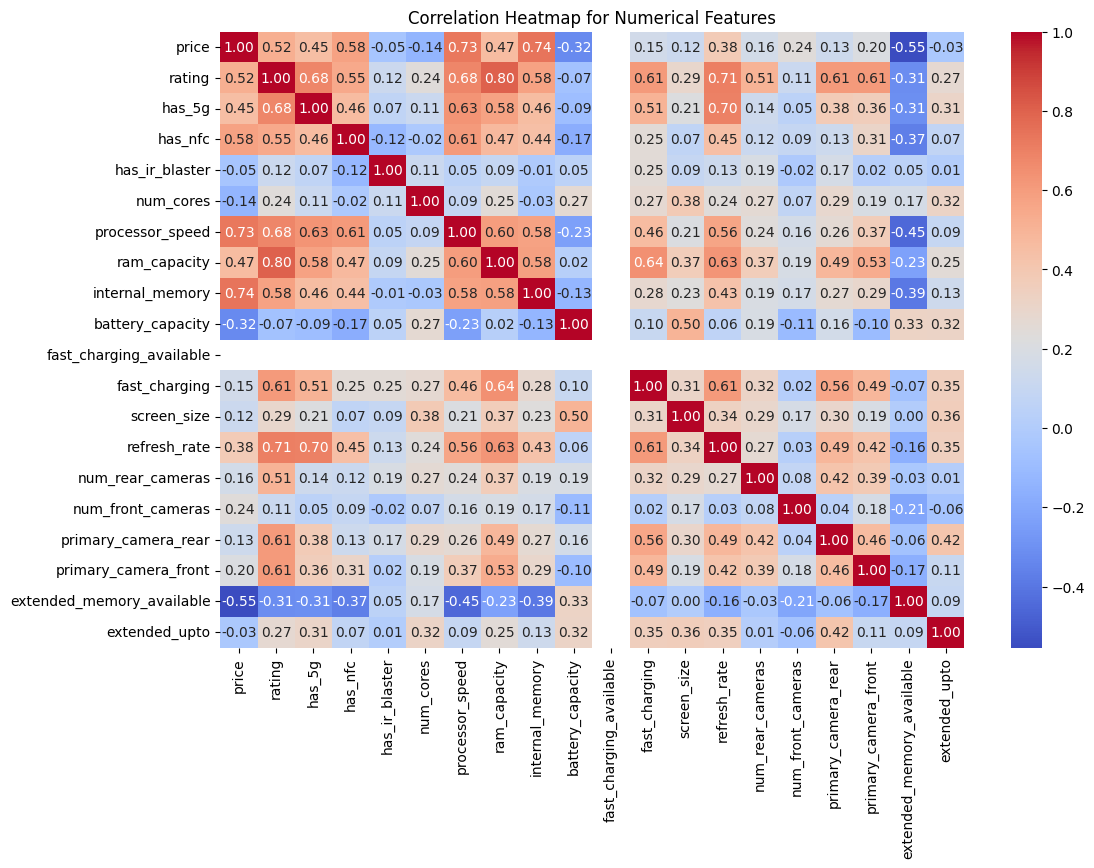

In [246]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

In [247]:
df.drop(columns=['fast_charging_available','extended_upto'], inplace=True)

In [248]:
df['processor_brand'].value_counts()

processor_brand
snapdragon    283
helio         200
dimensity     175
exynos         52
unisoc         39
bionic         29
tiger          22
mediatek       11
qualcomm        8
spreadtrum      7
tensor          4
apple           3
sc9863a         2
a13             2
google          2
hisilicon       1
kirin           1
Name: count, dtype: int64

In [249]:
brand_mapping = {
    'snapdragon': 'snapdragon',
    'qualcomm': 'snapdragon',
    'helio': 'mediatek',
    'dimensity': 'mediatek',
    'mediatek': 'mediatek',
    'bionic': 'bionic',
    'tiger': 'bionic',
    'apple': 'bionic',
    'a13': 'bionic',
    'exynos': 'exynos',
    'unisoc': 'unisoc',
    'sc9863a': 'unisoc',
    'spreadtrum': 'spreadtrum',
    'tensor': 'tensor',
    'google': 'tensor',
    'hisilicon': 'hisilicon',
    'kirin': 'hisilicon'
}


# Replace the processor brand names in the DataFrame
df['processor_brand'] = df['processor_brand'].replace(brand_mapping)


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_names                841 non-null    object 
 1   price                      841 non-null    int64  
 2   rating                     841 non-null    float64
 3   has_5g                     841 non-null    int32  
 4   has_nfc                    841 non-null    int32  
 5   has_ir_blaster             841 non-null    int32  
 6   processor_brand            841 non-null    object 
 7   num_cores                  841 non-null    float64
 8   processor_speed            841 non-null    float64
 9   ram_capacity               841 non-null    float64
 10  internal_memory            841 non-null    float64
 11  battery_capacity           841 non-null    float64
 12  fast_charging              841 non-null    float64
 13  screen_size                841 non-null    float64

In [251]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [252]:
X = df.drop(columns=['price'])
y = df['price']
y_transformed = np.log1p(y)

In [253]:
X.drop(columns=['has_ir_blaster', 'num_rear_cameras', 'num_front_cameras'],inplace=True)

In [254]:
X.select_dtypes(['int32','float64','int64']).columns

Index(['rating', 'has_5g', 'has_nfc', 'num_cores', 'processor_speed',
       'ram_capacity', 'internal_memory', 'battery_capacity', 'fast_charging',
       'screen_size', 'refresh_rate', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available'],
      dtype='object')

In [229]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['rating', 'has_5g', 'has_nfc', 'num_cores',
       'processor_speed', 'ram_capacity', 'internal_memory',
       'battery_capacity', 'fast_charging', 'screen_size', 'refresh_rate',
       'primary_camera_rear','primary_camera_front', 'extended_memory_available']),
        ('cat1',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),['brand_names','processor_brand','os','resolution'])
    ]

)

In [230]:
def scorer(model_name, model):
    
    output = []
    
    output.append(model_name)
    pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', model)
    ])
   
    
    # K-fold cross-validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')
    
    output.append(scores.mean())
    
    X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)
    
    pipeline.fit(X_train,y_train)
    
    y_pred = pipeline.predict(X_test)
    
    y_pred = np.expm1(y_pred)
    
    output.append(mean_absolute_error(np.expm1(y_test),y_pred))
    
    return output

In [231]:
model_dict = {
    'linear_reg':LinearRegression(),
    'svr':SVR(),
    'ridge':Ridge(),
    'LASSO':Lasso(),
    'decision tree': DecisionTreeRegressor(),
    'random forest':RandomForestRegressor(),
    'extra trees': ExtraTreesRegressor(),
    'gradient boosting': GradientBoostingRegressor(),
    'adaboost': AdaBoostRegressor(),
    'mlp': MLPRegressor(),
    'xgboost':XGBRegressor()
}

In [232]:
model_output = []
for model_name,model in model_dict.items():
    model_output.append(scorer(model_name, model))

C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\uttam\AppDat

C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\uttam\AppDat

C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\uttam\App

C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\uttam\Ap

In [233]:
model_df = pd.DataFrame(model_output, columns=['name','r2','mae'])
model_df.sort_values(['mae'])

,name,r2,mae
10,xgboost,0.938420,2960.283157
5,random forest,0.919613,2998.373173
6,extra trees,0.945631,3068.219457
7,gradient boosting,0.931463,3346.692364
0,linear_reg,0.911593,4059.404394
4,decision tree,0.869253,4144.047337
2,ridge,0.916402,4233.389473
1,svr,0.913752,4319.229665
8,adaboost,0.877956,4370.318482
9,mlp,0.407384,10115.908040


# Hyperparameter tuning

In [194]:
param_grid = {
    'regressor__n_estimators': [50, 100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__max_samples':[0.1, 0.25, 0.5, 1.0],
    'regressor__max_features': ['auto', 'sqrt']
}

In [195]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['rating', 'has_5g','has_nfc','num_cores',
       'processor_speed','ram_capacity', 'internal_memory','fast_charging',
       'screen_size', 'refresh_rate','primary_camera_rear', 'primary_camera_front','extended_memory_available']),
        ('cat1',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),['brand_names','processor_brand','os','resolution'])
    ]

)

In [196]:
 pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor',XGBRegressor())
    ])

In [197]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
search = GridSearchCV(pipeline, param_grid, cv=kfold, scoring='r2', n_jobs=-1, verbose=4)
search.fit(X, y_transformed)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [00:53:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_features", "max_samples" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['rating',
                                                                          'has_5g',
                                                                          'has_nfc',
                                                                          'num_cores',
                                                                          'processor_speed',
                                                                          'ram_capacity',
                                                                          'internal_memory',
                                                                          'fast_charging',
                                                                          'screen_size',
                                                                          'refresh_rate',
                                                                          'primary_camera_rear',
                                                                          'primary_camera_front',
                                                                          'exten...
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 10, 20, 30],
                         'regressor__max_features': ['auto', 'sqrt'],
                         'regressor__max_samples': [0.1, 0.25, 0.5, 1.0],
                         'regressor__n_estimators': [50, 100, 200, 300]},
             scoring='r2', verbose=4)

In [198]:
search.best_score_

0.937035724637418

In [199]:
search.best_params_

{'regressor__max_depth': None,
 'regressor__max_features': 'auto',
 'regressor__max_samples': 0.1,
 'regressor__n_estimators': 100}

In [200]:
search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['rating', 'has_5g',
                                                   'has_nfc', 'num_cores',
                                                   'processor_speed',
                                                   'ram_capacity',
                                                   'internal_memory',
                                                   'fast_charging',
                                                   'screen_size',
                                                   'refresh_rate',
                                                   'primary_camera_rear',
                                                   'primary_camera_front',
                                                   'extended_memory_available']),
                                                 ('cat1',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown=...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_features='auto',
                              max_leaves=None, max_samples=0.1,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None, ...))])

# Exporting the model

In [201]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['rating', 'has_5g','has_nfc','num_cores',
       'processor_speed','ram_capacity', 'internal_memory','fast_charging',
       'screen_size', 'refresh_rate','primary_camera_rear', 'primary_camera_front','extended_memory_available']),
        ('cat1',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),['brand_names','processor_brand','os','resolution'])
    ]

)

In [202]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=500))
])

In [203]:
pipeline.fit(X,y_transformed)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['rating', 'has_5g',
                                                   'has_nfc', 'num_cores',
                                                   'processor_speed',
                                                   'ram_capacity',
                                                   'internal_memory',
                                                   'fast_charging',
                                                   'screen_size',
                                                   'refresh_rate',
                                                   'primary_camera_rear',
                                                   'primary_camera_front',
                                                   'extended_memory_available']),
                                                 ('cat1',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown=...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=500, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [204]:
import pickle

with open('pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [205]:
with open('df.pkl', 'wb') as file:
    pickle.dump(X, file)

In [206]:
X.columns

Index(['brand_names', 'rating', 'has_5g', 'has_nfc', 'processor_brand',
       'num_cores', 'processor_speed', 'ram_capacity', 'internal_memory',
       'fast_charging', 'screen_size', 'resolution', 'refresh_rate', 'os',
       'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available'],
      dtype='object')

In [207]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_names                841 non-null    object 
 1   rating                     841 non-null    float64
 2   has_5g                     841 non-null    int32  
 3   has_nfc                    841 non-null    int32  
 4   processor_brand            841 non-null    object 
 5   num_cores                  841 non-null    float64
 6   processor_speed            841 non-null    float64
 7   ram_capacity               841 non-null    float64
 8   internal_memory            841 non-null    float64
 9   fast_charging              841 non-null    float64
 10  screen_size                841 non-null    float64
 11  resolution                 841 non-null    object 
 12  refresh_rate               841 non-null    float64
 13  os                         841 non-null    object 

In [208]:
X.iloc[2].values

array(['motorola', 84.0, 1, 1, 'mediatek', 8.0, 2.5, 8.0, 128.0, 68.0,
       6.55, '1080\u2009x\u20092400\u2009', 144.0, 'android', 50.0, 32.0,
       0.0], dtype=object)

In [209]:
data = [['motorola', 84.0, 1, 1, 0, 'dimensity', 8.0, 2.5, 8.0, 128.0,
       5000.0, 1.0, 68.0, 6.55, '1080\u2009x\u20092400\u2009', 144.0, 2.0,
       1.0, 'android', 50.0, 32.0, 0.0, 1024.0]]
columns = ['brand_names', 'rating', 'has_5g', 'has_nfc', 'has_ir_blaster',
       'processor_brand', 'num_cores', 'processor_speed', 'ram_capacity',
       'internal_memory', 'battery_capacity', 'fast_charging_available',
       'fast_charging', 'screen_size', 'resolution', 'refresh_rate',
       'num_rear_cameras', 'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'extended_upto']
# Convert to DataFrame
one_df = pd.DataFrame(data, columns=columns)

one_df

,brand_names,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,ram_capacity,internal_memory,...,screen_size,resolution,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,motorola,84.0,1,1,0,dimensity,8.0,2.5,8.0,128.0,...,6.55,1080 x 2400,144.0,2.0,1.0,android,50.0,32.0,0.0,1024.0


In [210]:
np.expm1(pipeline.predict(one_df))

C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([22171.9], dtype=float32)

In [236]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [237]:
 df[df['brand_names'] == 'apple']

,brand_names,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,ram_capacity,internal_memory,battery_capacity,fast_charging,screen_size,resolution,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available
39,apple,57999,80.0,1,1,0,bionic,6.0,3.22,6.0,128.0,3279.0,0.0,6.1,1170 x 2532,60.0,2.0,1.0,ios,12.0,12.0,0.0
50,apple,51499,78.0,1,1,0,bionic,6.0,3.22,4.0,128.0,3240.0,0.0,6.1,1170 x 2532,60.0,2.0,1.0,ios,12.0,12.0,0.0
70,apple,74900,83.0,1,1,0,bionic,6.0,3.46,6.0,128.0,3349.0,0.0,6.1,1179 x 2556,60.0,2.0,1.0,ios,48.0,12.0,0.0
103,apple,66999,82.0,1,1,0,bionic,6.0,3.22,6.0,128.0,4325.0,0.0,6.7,1284 x 2778,60.0,2.0,1.0,ios,12.0,12.0,0.0
105,apple,86900,84.0,1,1,0,bionic,6.0,3.46,6.0,128.0,4383.0,0.0,6.7,1290 x 2796,60.0,2.0,1.0,ios,48.0,12.0,0.0
140,apple,131990,87.0,1,1,0,bionic,6.0,3.78,8.0,128.0,3274.0,0.0,6.1,1179 x 2556,120.0,3.0,1.0,ios,48.0,12.0,0.0
163,apple,43900,73.0,0,1,0,bionic,6.0,2.65,4.0,64.0,3110.0,-1.0,6.1,828 x 1792,60.0,2.0,1.0,ios,12.0,12.0,0.0
211,apple,196900,89.0,1,1,0,bionic,6.0,3.78,8.0,1024.0,4422.0,0.0,6.7,1290 x 2796,120.0,3.0,1.0,ios,48.0,12.0,0.0
216,apple,129900,85.0,1,1,0,bionic,6.0,3.46,6.0,256.0,3200.0,0.0,6.1,1179 x 2556,120.0,3.0,1.0,ios,48.0,12.0,0.0
232,apple,48999,75.0,1,1,0,bionic,6.0,3.10,4.0,128.0,3925.8,-1.0,6.1,1170 x 2532,60.0,2.0,1.0,ios,12.0,12.0,0.0
